# **Introduction:**

This project is a part of Google Data Analytics certification. I have analyzed data from a fictional bike sharing company called Cyclistics, that is based out of Chicago. The purpose is to understand how casual riders and annual members use Cyclistic bikes differently. From the analysis, I have provided recommendations backed up with compelling data insights and professional data visualizations to design a new marketing strategy to convert casual riders into annual members.
In order to answer the key business questions, I have followed data analysis process i.e,ask, prepare, process, analyze, share, and act.

Tools used: Excel, MySQL, and Tableau.

# **About the company:**

In 2016, Cyclistic launched a successful bike-share offering. Since then, the program has grown to a fleet of 5,824 bicycles that are geotracked and locked into a network of 692 stations across Chicago. The bikes can be unlocked from one station and returned to any other station in the system anytime.
Until now, Cyclistic’s marketing strategy relied on building general awareness and appealing to broad consumer segments. One approach that helped make these things possible was the flexibility of its pricing plans: single-ride passes, full-day passes, and annual memberships. Customers who purchase single-ride or full-day passes are referred to as casual riders. Customers who purchase annual memberships are Cyclistic members.
Cyclistic’s finance analysts have concluded that annual members are much more profitable than casual riders. Although the pricing flexibility helps Cyclistic attract more customers, Moreno (the manager) believes that maximizing the number of annual members will be key to future growth. Rather than creating a marketing campaign that targets all-new customers, Moreno believes there is a very good chance to convert casual riders into members. She notes that casual riders are already aware of the Cyclistic program and have chosen Cyclistic for their mobility needs.
Moreno has set a clear goal: Design marketing strategies aimed at converting casual riders into annual members. In order to do that, however, the marketing analyst team needs to better understand how annual members and casual riders differ, why casual riders would buy a membership, and how digital media could affect their marketing tactics. Moreno and her team are interested in analyzing the Cyclistic historical bike trip data to identify trends.

# **Ask**

The main question to address here is,how do annual members and casual riders use Cyclistic bikes differently?

**Following are some guiding questions:**

1. What is the problem you are trying to solve?
The main objective is to find insights and pattern between casual riders and annual memebers and creating the best marketing strategies for converting casual bike riders into annual members.

2. How can your insights drive business decisions?
The insights will help the marketing team to increase company profitability.

# **Prepare**

At this point of time, I have used data of last 12 months which is from Jun,2022 to May,2023.
For updated data, look here: [https://divvy-tripdata.s3.amazonaws.com/index.html](http://)


**Guiding questions:**

1. Where is your data located?
The data is located in csv formated in the above link.

2. How is the data organized?
The data is separated by months in 13 columns.

3. Are there issues with bias or credibility in this data? Does your data ROCCC?
The data has full credibility and it has been made available by Motivate International Inc. under [https://ride.divvybikes.com/data-license-agreement](http://) .Hence it is ROCCC reliable, original, comprehensive, current and cited.

4. How are you addressing licensing, privacy, security, and accessibility?
The company has their own licence over the dataset. Besides that, the dataset doesn't have any personal information about the riders.

5. How did you verify the data’s integrity?
All the files have consistent columns and each column has the correct type of data.

6. How does it help you answer your question?
For the purposes of this case study, the datasets are appropriate which enables the data analyst to answer the business questions.

7. Are there any problems with the data?
There are lots of missing infomation on station names and station id.

# **Process**

**Guiding questions:**

1. What tools are you choosing and why?
Initially, I used Excel and later I have used MySQL for this project, for two main reasons: Because of the large dataset and to gather experience with the language.

2. Have you ensured your data’s integrity?
Yes, the data is consistent in most of the columns. Discussed later.

3. What steps have you taken to ensure that your data is clean?
First the duplicated values where removed, then the columns where formatted to their correct format and data type.

4. How can you verify that your data is clean and ready to analyze?
For this, I have documented the cleaning process. 

a.	Sources of errors – data validation

b.	Null data – using conditional formatting.

c.	Mistyped words

d.	Mistyped numbers

e.	Extra spaces & characters- trim function

f.	Duplicates- distinct function

g.	Mismatched data types

h.	Messy(inconsistent) strings

i.	Date formats

j.	Misleading variable labels (columns)

k.	Truncated data and more.


5. Have you documented your cleaning process so you can review and share those results?
Yes, it's all documented in MySQL workbench.

**Process documentation:**

1. Downloaded all the csv files for initial analysis of the data.

2. I decided to use EXCEL for the sorting and organizing of the data. SQL for the data cleaning, exploration and analysis and Tableau to create visualizations of my finding.

3. Checked for date formats, null values, data duplications,inconsistent character lengths, using data filters, conditional formating and created a table to remove duplicates in each file easily.

4. Then created 2 columns for better understanding of the data. First, 'ride length' column which is the difference between ended_at and started_at column (using this, negative values were deleted). Second, 'day of the week' column, which is formulated by 'WEEKDAY'(started_at column) taking sunday as first day of the week.

5. Imported all files into MySQL workbench by creating new database for further cleaning process.

6. Created new table to join all 12 csv files into one, using 'UNION ALL' function. And checked for total rows to the sum of all 12 files. Matched!

7. Renamed columns for better understanding.

8. Chnaging date format as sql recognises date format in 'YYYY-MM-DD HH:MI:SS', and also changed its data type to 'datetime' format.

9. Removed all the null values from 'station_name' columns and 'end_lat', 'end_lng' columns.

10. Removed inconsistent character lengths from 'rider_id', other than with '16' length.

11. Excluded outliers like trip less than 1 minute duration.

12. Then I look for total number of rides per month, per day of the week, per hour metrics and for different bike types

13. Average ride length for member and casual user types.

14. In this process, I left with 4326765 rows out of 5829030 earlier.

In [ ]:
#A sample of how I created and imported data in mysql workbench.

CREATE DATABASE cyclistic;

USE cyclistic;
Create TABLE jun_22
(
ride_id varchar(50),
ridable_type varchar(50),
started_at varchar(50),
ended_at varchar(50),
start_station_name text,
start_station_id text,
end_station_name text,
end_station_id text,
start_lat double,
start_lng double,
end_lat double,
end_lng double,
member_casual varchar(50)
);

# to make importing faster, I used 'LOAD DATA INFILE' function.

LOAD DATA INFILE 'C:/ProgramData/MySQL/MySQL Server 8.0/Uploads/202206-divvy-tripdata.csv' INTO TABLE jun_22
FIELDS TERMINATED BY ','
Lines terminated by '\n' 
IGNORE 1 LINES;

# to change date formating

UPDATE jun_22
SET ended_at =STR_TO_DATE(`ended_at`, '%d-%m-%Y %H:%i:%s');  

SET sql_mode ="";

# to change date data type

ALTER TABLE jun_22                         
MODIFY column `started_at` datetime;

In [ ]:
# combined all 12 files using UNION ALL function

CREATE TABLE cyclistic.combine_data AS
SELECT *
FROM (
SELECT * FROM cyclistic.jun_22 
UNION ALL 
SELECT * FROM cyclistic.july_22 
UNION ALL
SELECT * FROM cyclistic.aug_22 
UNION ALL
SELECT * FROM cyclistic.sep_22
UNION ALL
SELECT * FROM cyclistic.oct_22
UNION ALL
SELECT * FROM cyclistic.nov_22
UNION ALL
SELECT * FROM cyclistic.dec_22
UNION ALL
SELECT * FROM cyclistic.jan_23
UNION ALL 
SELECT * FROM cyclistic.feb_23
UNION ALL
SELECT * FROM cyclistic.mar_23
UNION ALL
SELECT * FROM cyclistic.apr_23
UNION ALL
SELECT * FROM cyclistic.may_23
) AS combine_data;

# checked for total rows of combined data matched with the sum of all 12 files.

In [ ]:
# precleaning data

# there are different ride_lengths 16(5826742),11(2041),10(222),9(22),8(2),6(1)
# delete inconsistent data other than ride length 16. 

SELECT length(ride_id), count(*)   
FROM combine_data                      
GROUP BY LENGTH(ride_id);

# checked if ride_id is unique

SELECT COUNT(DISTINCT ride_id)  
FROM combine_data;

# checking for duplicates, no duplicates, use distinct to remove duplicates

SELECT ride_id, count(ride_id)  
from combine_data
group by 1
having count(ride_id)>1;

# 3 types electric 3083395, classic 2588434, docked 157201

SELECT DISTINCT ridable_type   
FROM combine_data;
SELECT ridable_type, COUNT(*)
FROM combine_data
GROUP BY 1;

# We only want the rows (261573) where the time length of the ride was longer than one minute, but shorter than one day.

SELECT *                      
FROM combine_data                 
WHERE TIMESTAMPDIFF(minute,started_at,ended_at) <= 1 OR
   TIMESTAMPDIFF(minute,started_at, ended_at) >= 1440;

#112 rows where start time is greater than end time

SELECT count(*)            
FROM combine_data
WHERE started_at> ended_at;

#there are many -ve values which means start time > end time. 567.

SELECT MAX(ride_length) as max_ride, min(ride_length) as min_ride,
avg(ride_length) as average_ride
FROM(
SELECT ride_id,(ended_at-started_at)as ride_length     
FROM combine_data 
-- where (ended_at-started_at)<=0
) AS T;
   
#1 REPAIR STATION divvy cassette 2 times

SELECT start_station_name, count(*)       
FROM combine_data
GROUP BY 1
ORDER BY 1;


SELECT end_station_name, count(*)
FROM combine_data
GROUP BY 1
ORDER BY 1;

SELECT COUNT(DISTINCT(start_station_name)) AS unq_startname,
   COUNT(DISTINCT(end_station_name)) AS unq_endname,
   COUNT(DISTINCT(start_station_id)) AS unq_startid,
   COUNT(DISTINCT(end_station_id)) AS unq_endid
FROM combine_data;

#FINDING NULL VALUES for either station 1334103, and for all null=392199

SELECT count(*)          
FROM combine_data
WHERE start_station_name ='' AND start_station_id ='' or
    end_station_name ='' AND end_station_id ='';

# electric 1328054, classic 3342, docked 2707

SELECT ridable_type, count(*) as num_of_rides    
FROM combine_data
WHERE start_station_name ='' AND start_station_id ='' OR
    end_station_name ='' AND end_station_id ='' 
GROUP BY ridable_type;

# Check rows were latitude and longitude are null 5969

SELECT *          
FROM combine_data
WHERE start_lat !='' OR
 start_lng !='' OR
 end_lat !='' OR
 end_lng !='';

#Confirmed that there are only 2 member types in the member_casual column

SELECT DISTINCT member_casual   
FROM combine_data;

#exclude or remove these data from the combined table.

In [ ]:
#I created new table for all my next analysis excluding all the values mentioned in precleaning process.
#Used CASE statement to change the day and month columns from numbers to characters to make the table easier to read.

create table combine_clean as        #total rows 4326765
(
SELECT ride_id,ridable_type AS ride_type,started_at, 
CASE     WHEN DAYOFWEEK (started_at) = 1 THEN 'Sun'         
         WHEN DAYOFWEEK (started_at) = 2 THEN 'Mon'
         WHEN DAYOFWEEK (started_at) = 3 THEN 'Tues'
         WHEN DAYOFWEEK (started_at) = 4 THEN 'Wed'
         WHEN DAYOFWEEK (started_at) = 5 THEN 'Thur'
         WHEN DAYOFWEEK (started_at) = 6 THEN 'Fri'
         ELSE'Sat' 
      END AS day_of_week,
 CASE
         WHEN EXTRACT(MONTH FROM started_at) = 1 THEN 'Jan'
         WHEN EXTRACT(MONTH FROM started_at) = 2 THEN 'Feb'
         WHEN EXTRACT(MONTH FROM started_at) = 3 THEN 'Mar'
         WHEN EXTRACT(MONTH FROM started_at) = 4 THEN 'Apr'
         WHEN EXTRACT(MONTH FROM started_at) = 5 THEN 'May'
         WHEN EXTRACT(MONTH FROM started_at) = 6 THEN 'Jun'
         WHEN EXTRACT(MONTH FROM started_at) = 7 THEN 'July'
         WHEN EXTRACT(MONTH FROM started_at) = 8 THEN 'Aug'
         WHEN EXTRACT(MONTH FROM started_at) = 9 THEN 'Sept'
         WHEN EXTRACT(MONTH FROM started_at) = 10 THEN 'Oct'
         WHEN EXTRACT(MONTH FROM started_at) = 11 THEN 'Nov'
         ELSE 'Dec'
      END AS month,
EXTRACT(DAY FROM started_at) as day, EXTRACT(YEAR FROM started_at) AS year,
ended_at,start_station_name, start_station_id as start_id,
end_station_name, end_station_id as end_id, start_lat, start_lng, end_lat, end_lng, member_casual as user_type,
 TIMESTAMPDIFF(MINUTE,started_at,ended_at) as ride_length
 FROM combine_data 
 WHERE (started_at < ended_at) and TIMESTAMPDIFF(MINUTE,started_at,ended_at) > 1 and LENGTH(ride_id)=16 and
(start_station_name !='' AND start_station_id !='' AND end_station_name !='' AND end_station_id !='') 
and (start_lat !='' AND start_lng !='' AND end_lat !='' AND end_lng !='')
) ;

# **Analysis**

Now that the data is completely clean it is time to analyze the data.
To find out  'how do annual members and casual riders use Cyclistic bikes differently?' 

I came up with different metrics to get the clear picture of both the users.
1. Total number of rides by users
2. Total number of rides by different bike types
3. Average length of the rides by user type.
4. Most frequent time of the day the riders used the bike, same for the week and the month.
5. Most frequent start and ending stations by the users.

**Guiding questions:**

1. How should you organize your data to perform analysis on it?
The data has been organized into a single CSV concatenating all the files from the dataset.

2. Has your data been properly formatted?
Yes, all the columns have their correct data type.

3. What surprises did you discover in the data?
Surprised by the discovery that annual members have less riding time than casual.

4. What trends or relationships did you find in the data?
There are more members than casuals in the dataset.
There are more of a difference between the usage of bikes by users from weekdays to weekends.
Members have less riding time.
Members and casuals tend to prefer classic bikes.

5. How will these insights help answer your business questions?
This insights will help in understanding on how the annual members and casual riders use bikes differently and to create a marketing strategy on basis of this.

In [ ]:
#analysis process
#type of popular ride  done

SELECT ride_type, user_type, count(*) AS amount_of_rides, avg(ride_length) as avg_ride_length
FROM combine_clean
GROUP BY ride_type, user_type
ORDER BY user_type, amount_of_rides DESC;

#Finds the average ride length for each user type and bike type

SELECT user_type, CONCAT(ROUND(AVG(ride_length),2), " minutes") AS avg_ride_length
FROM combine_clean
GROUP BY user_type;

SELECT ride_type, CONCAT(ROUND(AVG(ride_length),2), " minutes") AS avg_ride_length
FROM combine_clean
GROUP BY ride_type;

#Finds the most popular days to ride on for annual members

SELECT user_type, day_of_week, count(*) as num_of_rides
FROM combine_clean
GROUP BY day_of_week, user_type
HAVING user_type like '%member%'
ORDER BY 3 DESC;

#Finds the most popular days to ride on for casual

SELECT user_type, day_of_week, count(*) as num_of_rides
FROM combine_clean
GROUP BY day_of_week, user_type
HAVING user_type like '%casual%'
ORDER BY 3 DESC;

#amount of rides per month

SELECT user_type, month, count(*) AS num_of_rides
FROM combine_clean
GROUP BY user_type, month;
   
#amount of rides per day: 

SELECT user_type, day_of_week, count(*) AS num_of_rides
FROM combine_clean
GROUP BY user_type, day_of_week;

#amount of rides per hour: 

create table rides_per_hour as
(SELECT user_type, ride_type, EXTRACT(HOUR FROM started_at) AS time_of_day, count(*) as num_of_rides
FROM combine_clean
GROUP BY user_type, ride_type, time_of_day
ORDER BY 4 DESC);


#average length of ride per day:

SELECT user_type, day_of_week, ROUND(AVG(ride_length), 0) AS avg_ride_length_minute,
	   ROUND(AVG(AVG(ride_length)) OVER(PARTITION BY user_type),2) AS combined_avg_ride_time
FROM combine_clean
GROUP BY user_type, day_of_week;

#starting station location for casuals/members:
#I averaged the latitude andlongitudes for all the docking stations with the same name andgrouped them by name.

SELECT user_type, start_station_name, ride_type, 
      ROUND(AVG(start_lat), 4) AS start_lat, 
      ROUND(AVG(start_lng), 4) AS start_lng,  
      count(*) AS num_of_rides
FROM combine_clean
GROUP BY user_type,start_station_name, ride_type;

#ending station name for casuals/members:

SELECT user_type, end_station_name, ride_type,
      ROUND(AVG(end_lat), 4) AS end_lat, 
      ROUND(AVG(end_lng), 4) AS end_lng,  
      count(*) AS num_of_rides
FROM combine_clean
GROUP BY user_type, end_station_name, ride_type;

#TOP FIVE starting stations by users

SELECT user_type,start_station_name, count(*) as number_of_rides
FROM combine_clean
group by 1,2
ORDER BY 3 DESC
LIMIT 10;

#TOP FIVE ending stations by user_type

SELECT user_type, end_station_name, count(*) as number_of_rides
FROM combine_clean
group by 1,2
ORDER BY 3 DESC
LIMIT 10;

**Findings from analysis**
1. Annual members made up 60.74% of all trips taken in last 12 months, whereas casual riders accounted for 39.26% of the rides. Further, both groups prefer classic bikes over electric bikes, whereas docked bikes were only used by casual riders. 

2. Number of rides taken on a classic bike and electric bike by members is greater than casual riders whereas, the average ride duration is higher in case of casual riders in all ride types.

3. Casual riders are not very active in the months from November to late March however, annual member ridership levels show less of a trend of dropping in the winter months in comparison to casual members. 

4. Annual members activity level rose significantly between 6am to 8am and peak between 4pm to 6pm, before dropping considerably after 7pm. Whereas, casual ridership levels are more consistent during the day.

When I analyzed the ridership levels per day of the week, month and by the average ride time.

5. From these findings, we can begin to hypothesize that annual members use Cyclistic bikes for commuting purposes as their ridership levels peak during the typical commuting times for work (8am/5pm) and drop outside of typical work hours. 

6. The biggest volume of data is on the the weekend.
   The highest volume of bikers in is the afternoon.
   Ridership for annual member is higher from Monday to Friday, while the     ridership for Casual rider avec highest during weekends.
   
7. We can also hypothesize that casual members use Cyclistic bikes more for leisure and travel purposes as the most rides taken by casual riders are on the weekends.

8. The annual members are moreover consistent during the weekdays, indicating the use of bike for work purposes.

9. The average ride length of casual riders is twice as high as of annual members. Meaning, casual riders uses bike for the longest duration in amount less time as would a tourist or a traveller do.

10. Temperature/season heavily influences the volume of rides in the month, mostly by the casual riders. As, these month would be offseason timings for visiting the place, in this case, due to very cold weather from November to late March month.

Therefore, both of these insights strongly support our hypothesis and we can conclude that annual members are typically commuters using Cyclistic’s bikes for short trips during the weekdays to get to work and casual riders typically use Cyclistic’s bikes on the weekend for leisure.

When I analyzed the most popular stations by the members and casuals.

11. From this finding, the most popular starting stations for casual members are generally near the water body, coastlines, lakes, parks; in contrast, annual members usually start their trips more city centre.

12. Further, casual riders’ top 5 most visited stations are the same for both starting and ending stations. These include Streeter Dr & Grand Ave (the pier), Millennium Park,Dusable lake, which are all very big tourist attractions and recreational areas. None of these stations are in the top 5 most visited for annual members, indicating that recreation and sightseeing are not as big of a priority  or rather they are locals/residents that use bikes to travel around the area daily.

13. On average, annual members start and end their journey at Kingsbury St. & Kinzie St. station and stay mostly concentrated on the city center. On the other hand, Casual riders mostly start and end theirjourney at Streeter Dr & Grand Av. Station and stay mostlyconcentrated on the coastline.

# **Share**

Lastly, I created the visualization of the data on Tableau. This was done by exporting the result into csv file, converting to xlsx file and importing to tableau.

To have a more interactive look on dashboard: 
https://public.tableau.com/app/profile/shubham.sadawarti/viz/CyclisticGooglecapstoneproject/Story1



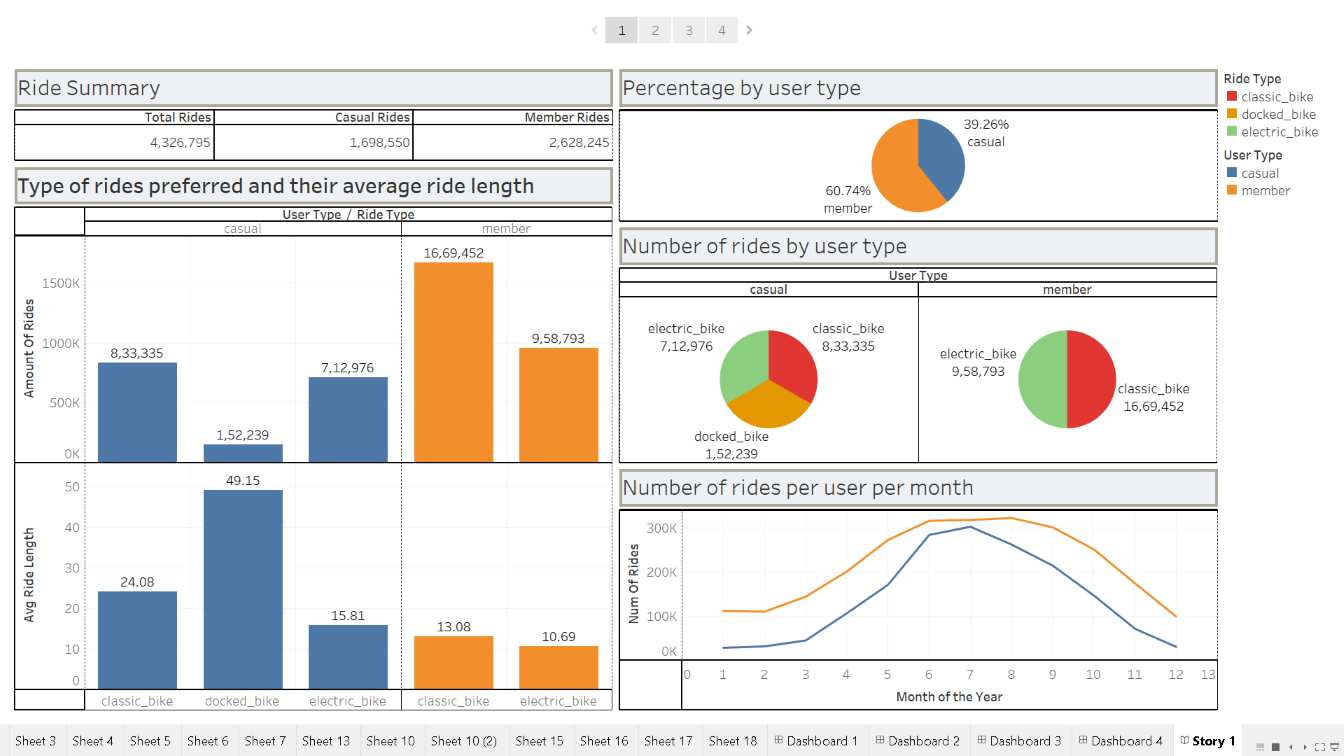

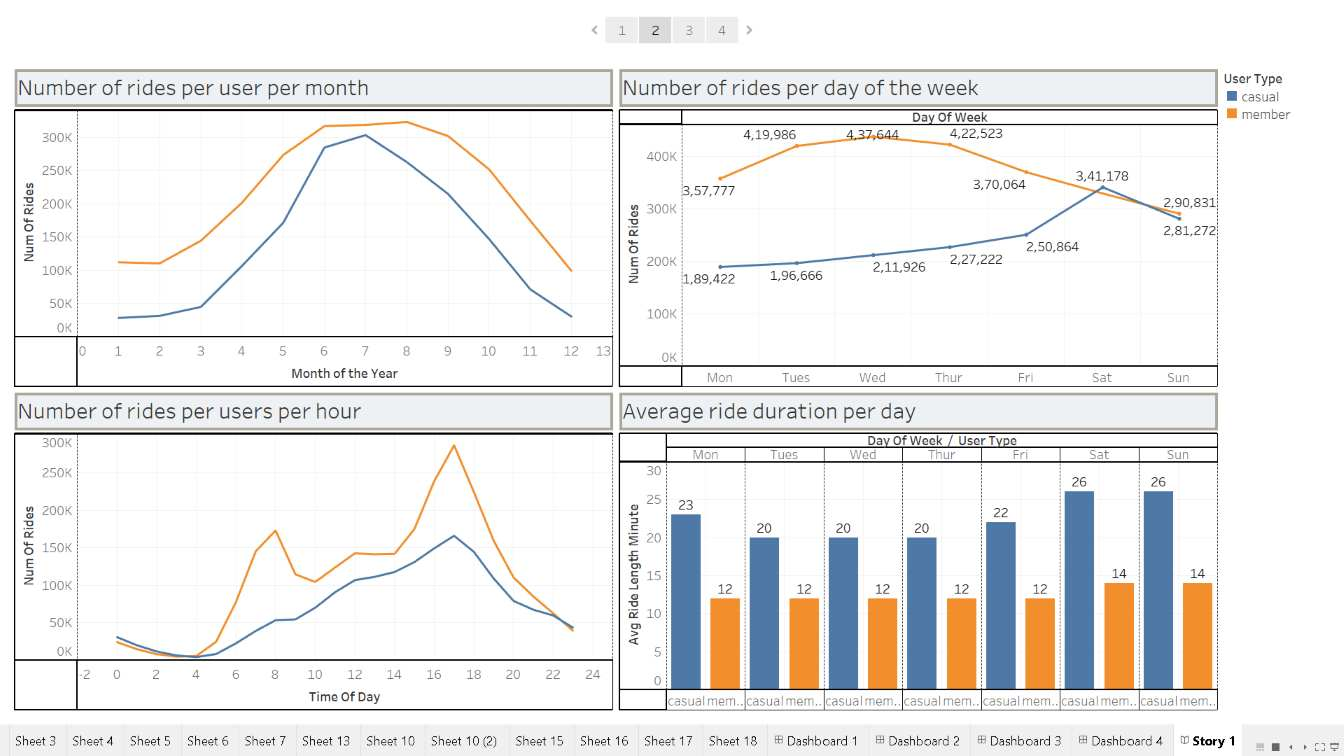

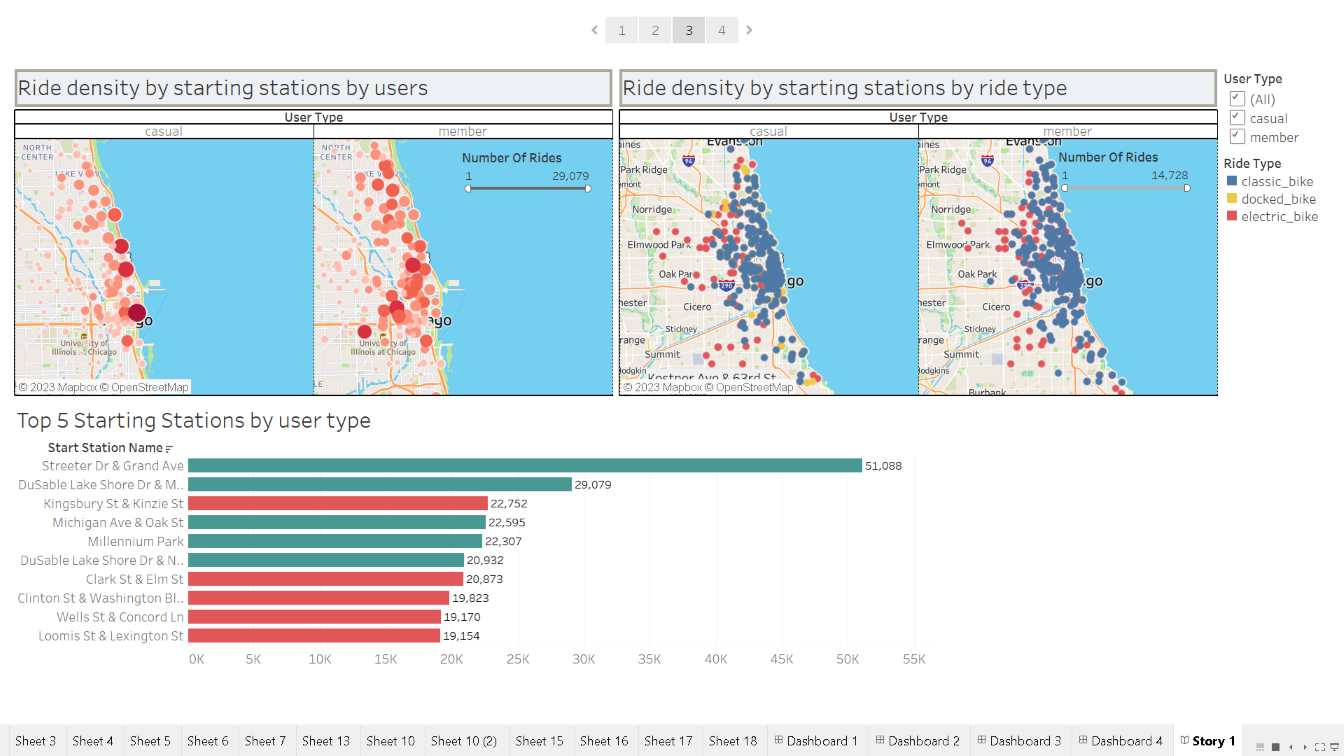

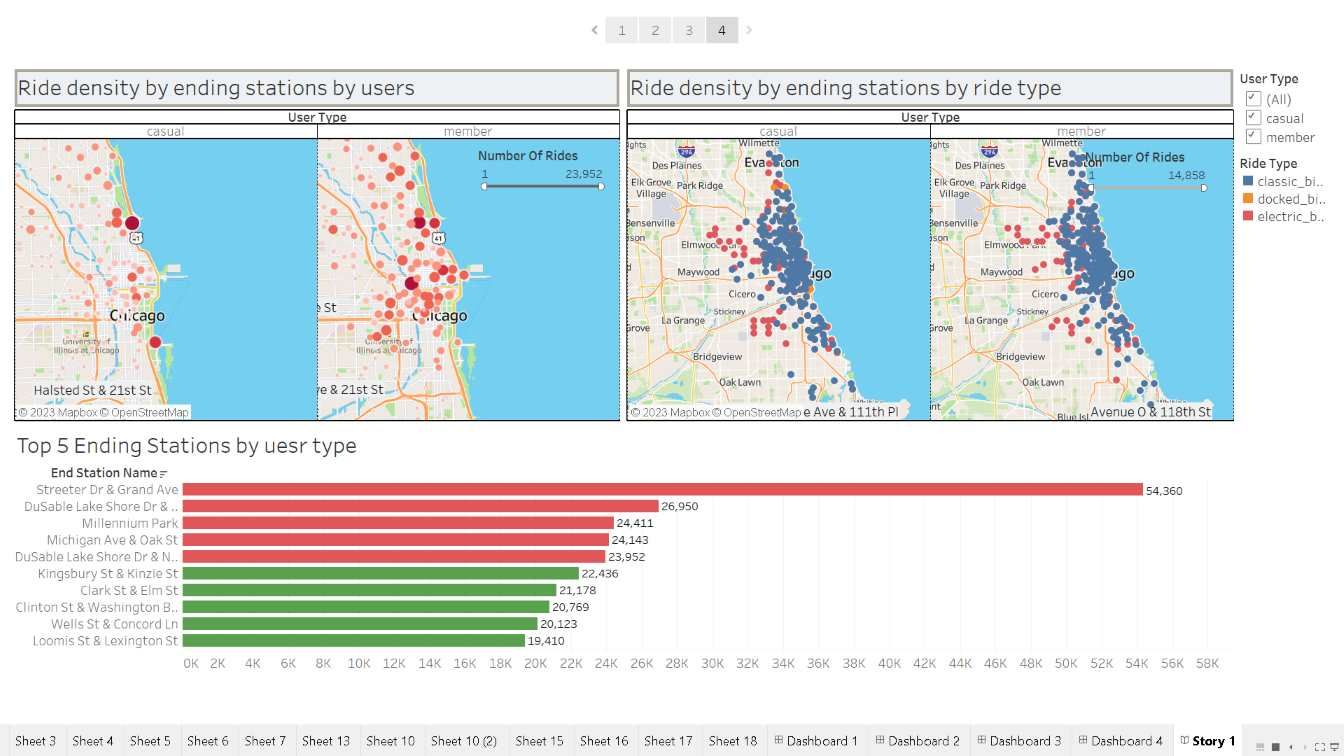


**Guiding questions:**

1. Were you able to answer the question of how annual members and casual riders use Cyclistic bikes differently?
Yes. The data points to several differences between casuals and members.

2. What story does your data tell?
The main story the data tells is that members have a set schedules, as be seen on dashboard. Whereas, the casual riders are more active on the weekends of the summer time.

3. How do your findings relate to your original question?
The insights gathered from the clean data and depicting the same form dashboard, it shows considerable pattern between the member and casual riders. The main objective was to find how casual riders use bike differently than the annual members which was shown in the tableau visualization.

4. Who is your audience? What is the best way to communicate with them?
The main target audience is my manager Moreno and cyclistic marketing analytics team. The best way to communicate is by giving presentation of the findings.

5. Can data visualization help you share your findings?
Yes, it is the most important part of the process of sharing the insights with the target audience.

6. Is your presentation accessible to your audience?
Yes, the visualization is created with bright and contrast colours. Also, it can be shared easily.

# **Act**

The final act stage is the implementation of the findings from the analysis. 

**Guiding questions:**

1. What is your final conclusion based on your analysis?
Members and casual have different patterns when using the bikes. The conclusion is further stated on the share phase.

2. How could your team and business apply your insights?
The insights could be implemented when preparing a marketing campaign for turning casual into members. 

3. What next steps would you or your stakeholders take based on your findings?
Further analysis could be done to improve the findings, feedbacks or doubts regarding the analysis would be answered. Then, the marketing team can take decision on designing the marketing campaign.

4. Is there additional data you could use to expand on your findings?
Additional information on the prices of the bikes, annual subscription would be of great help in further analysis of the data.

Followings are some recommendations to the marketing team and manager Moreno.

**Recommendations**

1. A marketing campaign should be focus on the most popular casual rider stations and recreational or tourist sites.

2. Coupons and discounts could be offered to casual riders during this off period.

3. During summer seasonal period, the campaign should start from March and finish at the beginning of November. To reach out the most riders, the marketing campaign should be more aggressive during the weekend as it is the time of the week when most casual riders are using the service.

4. Cyclistic bike share can implement on having a new subscription serices for casual riders that focuses on yearly weekend-only membership to encourage casual riders to annual membership.

5. Another suggestion would be to create a social media campaign that highlights the use and benefits of riding Cyclistics electric bike. It should show the benefits of using an electric bike, while at the same time mentioning the companies plan of increasing the amount of electric bikes.

6. Emphasizing on the benefits of annual memberships by taking testimonials from existing members about how using Cyclistic's system has changed their life, to create a sense of community, offering a limited time discount will help encourage new riders to join the program.

# **Remark**

With this recommendations, I finish my first ever capstone project. Please, leave any suggestions or feedback on the project in the comment section, much appreciated.

Thank you for reading through the project.